### Import dataset and packages

In [1]:
from  pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

Import dataset

In [2]:
data_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

### Data preparation

In [3]:
header = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = read_csv(data_path, names = header)

Divide dataset into independent (Predictors) and dependent (Target) dataset

In [4]:
X = dataset.iloc[:, 0:4].values
Y = dataset.iloc[:, 4].values
print("Shape of X", X.shape)
print("Shape of Y", Y.shape)

Shape of X (150, 4)
Shape of Y (150,)


Data standardization

In [5]:
scaler = StandardScaler() # Z scaling
scaler.fit(X)
X = scaler.transform(X)

### K nearest neighbors implementation

Divide dataset into Training and Testing data

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
X_test.shape, Y_test.shape

result = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix :\n", result)
acc = accuracy_score(Y_test,Y_pred)
print("Accuracy =","%3.2f" % (acc * 100),"%")

print("Test Precision: {}%".format(round(precision_score(y_true=Y_test, y_pred=Y_pred,average='micro')*100,2), "\n"))
print("Test Recall: {}%".format(round(recall_score(y_true=Y_test, y_pred=Y_pred,average='micro')*100,2), "\n"))
print(classification_report(Y_test, Y_pred))

Confusion Matrix :
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]
Accuracy = 96.67 %
Test Precision: 96.67%
Test Recall: 96.67%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



## Visualize the confusion matrix

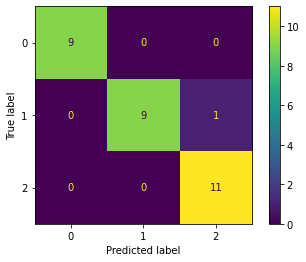

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=[0,1,2])
cmd.plot()

In [16]:
from sklearn.metrics import precision_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
print("Test Precision: {}%".format(round(precision_score(y_true=Y_test, y_pred=Y_pred,average='micro')*100,2), "\n"))
print("Test Recall: {}%".format(round(recall_score(y_true=Y_test, y_pred=Y_pred,average='micro')*100,2), "\n"))
print(classification_report(Y_test, Y_pred))

Test Precision: 96.67%
Test Recall: 96.67%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



[Text(0.4444444444444444, 0.9285714285714286, 'x[2] <= -0.744\ngini = 0.667\nsamples = 120\nvalue = [41, 40, 39]'),
 Text(0.3333333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.5555555555555556, 0.7857142857142857, 'x[3] <= 0.725\ngini = 0.5\nsamples = 79\nvalue = [0, 40, 39]'),
 Text(0.3333333333333333, 0.6428571428571429, 'x[2] <= 0.905\ngini = 0.169\nsamples = 43\nvalue = [0, 39, 4]'),
 Text(0.2222222222222222, 0.5, 'x[0] <= -1.082\ngini = 0.093\nsamples = 41\nvalue = [0, 39, 2]'),
 Text(0.1111111111111111, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[2] <= 0.677\ngini = 0.049\nsamples = 40\nvalue = [0, 39, 1]'),
 Text(0.2222222222222222, 0.21428571428571427, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.4444444444444444, 0.21428571428571427, 'x[3] <= 0.462\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini =

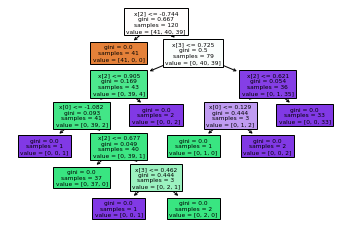

In [11]:
tree.plot_tree(clf, filled = True)

### Cross validation

In [17]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
k_folds = KFold(n_splits = 10, shuffle=True)
scores = cross_val_score(classifier, X, Y, cv=k_folds)
print("Mean =","%3.2f" % (scores.mean() * 100),"%")
print("Standard deviation =","%3.2f" % (scores.std() * 100))

Mean = 95.33 %
Standard deviation = 5.21
